# Time-Series statistics for Financial Time-Series Analysis
The goal of this assignment is to enable students to under the importance of statistics in the financial time analysis and forecast. 

## Prepare libraries

In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import norm, t
import requests 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Get all set50 symbols

In [2]:
url = 'https://classic.set.or.th/mkt/sectorquotation.do?sector=SET50&language=en&country=US'
html = requests.get(url).content
df_list = pd.read_html(html)
df = df_list[-1]
set50_lis = df['Symbol']
set50 = np.array(set50_lis)
print(set50)

['ADVANC' 'AOT' 'AWC' 'BANPU' 'BBL' 'BDMS' 'BEM' 'BGRIM' 'BH' 'BTS' 'CBG'
 'CENTEL' 'COM7' 'CPALL' 'CPF' 'CPN' 'CRC' 'DELTA' 'DTAC' 'EA' 'EGCO'
 'GLOBAL' 'GPSC' 'GULF' 'HMPRO' 'INTUCH' 'IVL' 'JMART' 'JMT' 'KBANK' 'KTB'
 'KTC' 'LH' 'MINT' 'MTC' 'OR' 'OSP' 'PTT' 'PTTEP' 'PTTGC' 'RATCH' 'SCB'
 'SCC' 'SCGP' 'TIDLOR' 'TISCO' 'TOP' 'TRUE' 'TTB' 'TU']


## Get daily log-return of all stocks in SET50 in 01/01/2022-31/12/2022. Here, we will use adjusted closed prices

In [3]:
log_ret = dict() # create empty dictionary
    # sym = "ADVANC" # stock symbol
for sym in set50:
  df = yf.download(sym + ".BK", start="2022-01-01", end="2022-12-20") # download 2022 data
  close_price = df['Adj Close']
  #print(close_price)
  ret = close_price.pct_change(1)
  ret = ret.dropna()
  log_ret[sym] = np.log(1 + ret)
log_ret = pd.DataFrame(data=log_ret, index=ret.index)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
log_ret

,ADVANC,AOT,AWC,BANPU,BBL,BDMS,BEM,BGRIM,BH,BTS,...,RATCH,SCB,SCC,SCGP,TIDLOR,TISCO,TOP,TRUE,TTB,TU
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-05,-0.008811,0.000000,-0.012526,0.027909,0.011929,0.013304,0.000000,-0.006192,-0.021506,-0.005305,...,0.000000,NaN,0.002581,-0.014652,0.013158,0.002535,0.039221,-0.004246,-0.013699,0.015038
2022-01-06,-0.022372,-0.020451,-0.042925,0.009132,-0.019961,-0.013304,-0.017700,-0.018809,-0.033152,-0.016086,...,-0.016714,NaN,-0.015585,-0.033774,-0.019803,-0.010178,-0.009662,-0.012848,-0.027974,0.019705
2022-01-07,0.000000,0.012320,-0.004396,0.018018,0.004024,0.008889,-0.011976,-0.006349,0.007463,-0.005420,...,-0.005634,NaN,-0.005249,-0.007663,-0.013423,-0.002561,0.014458,-0.004320,0.027974,0.000000
2022-01-10,-0.009091,-0.008197,-0.013304,0.000000,0.011976,0.004415,-0.012121,-0.006390,0.003711,0.000000,...,0.005634,NaN,0.005249,0.003839,0.013423,0.005115,-0.004796,-0.008696,-0.006920,0.009709
2022-01-11,0.022574,-0.008265,0.004454,0.000000,0.003960,-0.004415,0.000000,0.000000,0.003697,0.010811,...,0.000000,NaN,0.018159,0.015209,-0.027029,0.002548,0.000000,0.021599,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-13,-0.002677,0.010152,0.008032,0.000000,0.013938,-0.008889,0.000000,0.006601,-0.019231,0.006006,...,0.000000,0.000000,-0.009023,-0.004338,-0.008511,0.005076,0.000000,0.021506,0.000000,-0.011976
2022-12-14,0.000000,0.000000,0.007968,0.007326,-0.006944,0.008889,0.000000,0.000000,0.023982,-0.006006,...,0.005935,0.004843,0.014993,0.008658,0.008511,0.002528,0.009174,0.000000,0.014599,0.011976
2022-12-15,-0.005376,-0.013560,-0.024098,-0.007326,0.000000,0.000000,0.000000,0.032365,-0.004751,-0.006042,...,0.000000,-0.004843,-0.011976,-0.013015,0.000000,-0.002528,0.000000,-0.004264,0.000000,-0.005970


# Risk Management 

Here, we will use the confidence interval of price derived on** Page 54 of Lecture on Statistics of financial time series** to compute 1% maximum drawdown (MDD). Let $\mathcal{P}_0$ be the value of the portfolio at a time $t=0$. Let $p_{\alpha}(t)$ be defined as a value such that

$Pr\left[\mathcal{P}_t \leq p_{\alpha}(t) \right] = \alpha$

The $100\alpha$ % maximum drawdown is defined as 

$\frac{p_{\alpha}(t) - \mathcal{P}_0 }{\mathcal{P}_0$}$


## 1. Using the log-return, compute $\mu_r$ and $\sigma_r$ for all stocks in SET50, and save as "statisticsLogReturn.xlsx"

In [5]:
# Your code is here. Please also submit 'statisticsLogReturn.xlsx' in the 
# Google Classroom.
Mu_r = log_ret.mean()   # compute mean
std_r = log_ret.std(ddof=1)  # compute std
# convert to datafram
SET50_Mu_Mean = Mu_r.to_frame().rename(columns = {0:'Mean'})
SET50_Mu_STD = std_r.to_frame().rename(columns = {0:'STD'})
# add lebel index
#SET50_Mu_Mean = SET50_Mu_Mean.rename(columns = {0:'Mean'})
#SET50_Mu_STD = SET50_Mu_STD.rename(columns = {0:'STD'})
# transpose
SET50_Mu_Mean = SET50_Mu_Mean.T
SET50_Mu_STD = SET50_Mu_STD.T
# add to datafram
SET50_Mu_Mean = SET50_Mu_Mean.append(SET50_Mu_STD)

SET50_Mu_Mean = SET50_Mu_Mean.T
SET50_Mu_Mean.to_excel("statisticsLogReturn.xlsx") # save to excel file
SET50_Mu_Mean

,Mean,STD
ADVANC,-0.000729,0.012018
AOT,0.000769,0.009261
AWC,0.001099,0.015305
BANPU,0.001282,0.018720
BBL,0.000725,0.011379
BDMS,0.001083,0.014735
BEM,0.000565,0.011908
BGRIM,-0.000069,0.018744
BH,0.001842,0.017052
BTS,-0.000411,0.011898


The $100\alpha$ %  MDD is defind as the ratio of the lower bound $100\alpha$ % confidence interval and $P_0$ minus 1, i.e.,

$MDD = \frac{P_0 \exp\left(\mu_r T - z\left(1-\alpha\right)\sigma_r\right)}{P_0} - 1 = \exp\left(\mu_r T - z\left(1-\alpha\right)\sigma_r\right) -1$

## 2. Compute the 1% MDD of all SET50 stocks, and report the **highest** (most negative) and **lowest** MDD (less negative) for 100 days holding of all SET50 stocks.
Note that $Z(1-\alpha)$ can be computed from norm.ppf(1-$\alpha$).

In [6]:
"""SET50_STOCKs = dict() # create empty dictionary
    # sym = "ADVANC" # stock symbol
for sym in set50:
  df = yf.download(sym + ".BK", start="2022-01-01", end="2022-12-20") # download 2022 data
  close_price = df['Adj Close']
  #print(close_price)
  #ret = close_price.pct_change(1)
  #ret = ret.dropna()
  SET50_STOCKs[sym] = close_price
SET50_STOCKs = pd.DataFrame(data=SET50_STOCKs, index=ret.index) """

from scipy.stats import norm
statistics_Log_Return = SET50_Mu_Mean.copy()
z = norm.ppf(1-0.01)
print(z)

2.3263478740408408


In [7]:
# Your code is here
T = 100 # day
print(T)
statistics_Log_Return["MDD"] = (np.exp(statistics_Log_Return['Mean']*T - z*statistics_Log_Return['STD']*np.sqrt(T))-1)*100
statistics_Log_Return

100


,Mean,STD,MDD
ADVANC,-0.000729,0.012018,-29.704191
AOT,0.000769,0.009261,-12.939848
AWC,0.001099,0.015305,-21.816256
BANPU,0.001282,0.018720,-26.454631
BBL,0.000725,0.011379,-17.488877
BDMS,0.001083,0.014735,-20.899191
BEM,0.000565,0.011908,-19.792172
BGRIM,-0.000069,0.018744,-35.783689
BH,0.001842,0.017052,-19.142118
BTS,-0.000411,0.011898,-27.234997


In [8]:
print(f"Highest MDD {statistics_Log_Return['MDD'].max():.2f} % with Stock Symbol: {statistics_Log_Return['MDD'].idxmax()}")
print(f"Lowest MDD {statistics_Log_Return['MDD'].min():.2f} % with Stock Symbol: {statistics_Log_Return['MDD'].idxmin()}")

Highest MDD -10.74 % with Stock Symbol: TISCO
Lowest MDD -50.63 % with Stock Symbol: JMART


- Highest MDD ____ % with Stock Symbol:____ 
- Lowest MDD _____ % with Stock Symbol:_____

# 3. Construct a portfolio containing equal amoung of BGRIM and PTTEP. For simplicity, let us put 500k on each BGRIM and PTTEP on 04/01/222 (First trading day in 2022). Plot the gain of the port in 2022.

In [9]:
# Your code is here
STOCKs_B_P = dict() # create empty dictionary
    # sym = "ADVANC" # stock symbol
STOCKS = ["BGRIM","PTTEP"]
for sym in STOCKS:
  df = yf.download(sym + ".BK", start="2022-01-01", end="2022-12-20") # download 2022 data
  close_price = df['Adj Close']
  #print(close_price)
  #ret = close_price.pct_change(1)
  #ret = ret.dropna()
  STOCKs_B_P[sym] = close_price
STOCKs_B_P = pd.DataFrame(data=STOCKs_B_P, index=close_price.index)
STOCKs_B_P

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BGRIM,PTTEP
Date,,
2022-01-04,40.130531,113.672440
2022-01-05,39.882809,114.623680
2022-01-06,39.139648,113.672440
2022-01-07,38.891933,117.952995
2022-01-10,38.644211,116.526146
...,...,...
2022-12-13,38.000000,175.000000
2022-12-14,38.000000,174.000000
2022-12-15,39.250000,173.000000


BGRIM     40.130531
PTTEP    113.672440
Name: 2022-01-04 00:00:00, dtype: float64


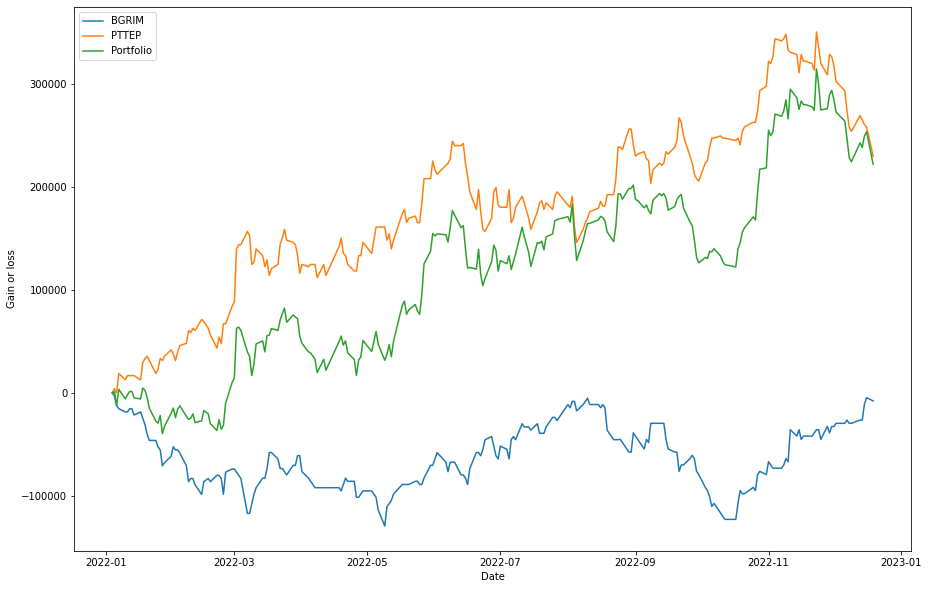

In [10]:
portfolio = dict()
print(STOCKs_B_P.iloc[0])
invest = (STOCKs_B_P-STOCKs_B_P.iloc[0])/STOCKs_B_P.iloc[0]*500000   # 2022-01-04 invest
invest["Portfolio"] = invest["BGRIM"]+invest["PTTEP"]
plt.figure(figsize = (15,10))
plt.ylabel("Gain or loss")
plt.xlabel("Date")
plt.plot(invest["BGRIM"],label = "BGRIM")
plt.plot(invest["PTTEP"],label = "PTTEP")
plt.plot(invest["Portfolio"],label = "Portfolio")
plt.legend()
plt.show()

## 4. Compute the 1% MDD of the above portfolio.

In [11]:
# Your code is here
MDD_compute = dict()

BGRIM = yf.download(STOCKS[0] + ".BK", start="2022-01-01", end="2022-12-20") 
PTTEP = yf.download(STOCKS[1] + ".BK", start="2022-01-01", end="2022-12-20")

BGRIM_close_price = BGRIM['Adj Close']
PTTEP_close_price = PTTEP['Adj Close']

BGRIM_ret = BGRIM_close_price.pct_change(1)
PTTEP_ret = PTTEP_close_price.pct_change(1)

Portfolio_ret = (BGRIM_ret + PTTEP_ret )/2 #MEAN
MDD_compute = pd.DataFrame([BGRIM_ret,PTTEP_ret,Portfolio_ret]).T
MDD_compute.columns = (["BGRIM","PTTEP","Portfolio"])
MDD_compute = np.log(MDD_compute + 1).dropna()
MDD_compute 

Mu_r2 = MDD_compute.mean()   # compute mean
std_r2 = MDD_compute.std(ddof=1)  # compute std
# convert to datafram
Mu_Mean2 = Mu_r2.to_frame().rename(columns = {0:'Mean'})
Mu_STD2 = std_r2.to_frame().rename(columns = {0:'STD'})
# add lebel index
#SET50_Mu_Mean = SET50_Mu_Mean.rename(columns = {0:'Mean'})
#SET50_Mu_STD = SET50_Mu_STD.rename(columns = {0:'STD'})
# transpose
Mu_Mean2 = Mu_Mean2.T
Mu_STD2 = Mu_STD2.T
# add to datafram
Mu_Mean2 = Mu_Mean2.append(Mu_STD2)

Mu_Mean2 = Mu_Mean2.T
MDD_2STOCKs = Mu_Mean2.copy()
MDD_2STOCKs

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Mean,STD
BGRIM,-0.000069,0.018744
PTTEP,0.001639,0.017825
Portfolio,0.000890,0.011156


In [12]:
z = norm.ppf(1-0.01)
print(z)

2.3263478740408408


In [13]:
T = 100 # day
MDD_2STOCKs["MDD"] = (np.exp(MDD_2STOCKs['Mean']*T - z*MDD_2STOCKs['STD']*np.sqrt(T))-1)*100
MDD_2STOCKs

,Mean,STD,MDD
BGRIM,-0.000069,0.018744,-35.783689
PTTEP,0.001639,0.017825,-22.178574
Portfolio,0.000890,0.011156,-15.673900


In [14]:
MDD_PORT = MDD_2STOCKs["MDD"]["Portfolio"]
MDD_PTTEP = MDD_2STOCKs["MDD"]["PTTEP"]
MDD_BGRIM = MDD_2STOCKs["MDD"]["BGRIM"]

In [15]:
print(f"My Port MDD: {MDD_PORT:.2f} , PTTEP MDD: {MDD_PTTEP:.2f}, BGRIM MDD: {MDD_BGRIM:.2f}.")

My Port MDD: -15.67 , PTTEP MDD: -22.18, BGRIM MDD: -35.78.


My Port MDD: _______ , PTTEP MDD:______, BGRIM MDD: ______.

## 5. Why do my port MDD is significant smaller (less negative) both PTTEP and BGRIM? 

Answer Because my port invest 2 stocks and 2 stocks not correlation. As a result, reduce investment risks.

## Compute lag 1 auto-correlation value $\rho(1)$, and sort from the largest to smallest 

In [16]:
rho1 = dict()
for sym in set50:
  rho1[sym] = log_ret[sym].autocorr(lag=1)
rho1_sorted = {sym: rho for sym, rho in sorted(rho1.items(), key = lambda item: item[1], reverse=True)}
print(rho1_sorted)

{'TOP': 0.20421258641459003, 'PTTGC': 0.16305795722277963, 'SCGP': 0.12850798068707447, 'GPSC': 0.10396138199634057, 'KTC': 0.0883397460642183, 'CBG': 0.08472939369970492, 'IVL': 0.08210256450079388, 'MTC': 0.07428149945694223, 'EA': 0.06940781350852254, 'KBANK': 0.06916237576602934, 'GLOBAL': 0.06560646886271346, 'MINT': 0.05906698216765239, 'SCC': 0.05708878019644391, 'BGRIM': 0.05480296824127216, 'CPN': 0.03772108749639876, 'TTB': 0.0317033101655039, 'BANPU': 0.02202729712129698, 'TU': 0.021342856190818837, 'DELTA': 0.01352083497325038, 'PTTEP': 0.009655212828048454, 'JMT': 0.00031605520513224315, 'PTT': -0.00603783122964074, 'LH': -0.014790606787920992, 'CPF': -0.01793321253292274, 'SCB': -0.020531336340439386, 'TIDLOR': -0.02877854160278522, 'BBL': -0.0340278610813493, 'ADVANC': -0.03642371267828062, 'CPALL': -0.037924622881008056, 'BTS': -0.03930534178059624, 'HMPRO': -0.044495256193777644, 'JMART': -0.045474251235595065, 'INTUCH': -0.049470292897955084, 'OSP': -0.050117343032067

In [17]:
rho1_sorted_df = pd.DataFrame.from_dict(rho1_sorted,orient ='index').rename(columns = {0:'Auto-covaraiance'})
rho1_sorted_df = rho1_sorted_df.sort_values(by=['Auto-covaraiance'],ascending=False)
rho1_sorted_df 

,Auto-covaraiance
TOP,0.204213
PTTGC,0.163058
SCGP,0.128508
GPSC,0.103961
KTC,0.088340
CBG,0.084729
IVL,0.082103
MTC,0.074281
EA,0.069408
KBANK,0.069162


## 6. What are:
- Highest $\rho(1)$: _____ and 
- lowest $\rho(1)$:_________ ?

In [18]:
print(f"Highest {rho1_sorted_df.idxmax()}")
print(f"Highest {rho1_sorted_df.idxmin()}")

Highest Auto-covaraiance    TOP
dtype: object
Highest Auto-covaraiance    AWC
dtype: object


หาค่า auto corrilation

## 7. Using the stock with highest $\rho(1)$ to construct the minimum mean square error forcast using three hitorical vales to forecast future. An example is on 58 of the Lecture 05.
Please note that

$X_t = r_t - \mu_r$ 

หาค่า alpha0 , alpha1, alpha2 ตัวอย่างหน้า 83

In [19]:
log_ret_TOP = log_ret["TOP"]
rho = [1]
for h in range(1,11):
  rho.append(log_ret_TOP.autocorr(lag=h))
rho = np.array(rho)
gamma0 = log_ret_TOP.var(ddof=1)
gamma = rho*gamma0
b = gamma[1:4]
A = [[gamma[0],gamma[1],gamma[2]],
     [gamma[1],gamma[0],gamma[1]],
     [gamma[2],gamma[1],gamma[0]]]
al = np.linalg.solve(A,b)
print(al)

[ 0.24025606 -0.2328904  -0.05880283]


In [20]:
# Your code is here

The prediction equation is given as:

$\hat{X}_t = \_\_\_\_ X_{t} +  \_\_\_\_ X_{t-1} + \_\_\_\_ X_{t-2}$


## 8. Using this forecast for trading strategy where you will take the all-in position (use all money to buy the stocks) if the forecast predicts $\hat{r}_{t+1} = \hat{X}_{t+1} + \mu_r > 0$, and no position (sell all stocks to keep cash)if the forecast predicts $\hat{r}_{t+1} = \hat{X}_{t+1} + \mu_r \leq 0$.

Let us assume that the initial wealth on 2021-01-04 is at 1,000,000 THB, and we are trading the stock with highest $\rho(1)$ in Problem 6. 

Assume that there is no transaction cost and stocks are inifinitely divisible. 
 - What is the final size of the portfolio at the end of 2022? 
 - Gain or loss in percentages of this trading strategy. 
 - Compare to buy-and-hold strategy where, on the first trading date, you take the all-in position and sell the stock at the end of 20222.

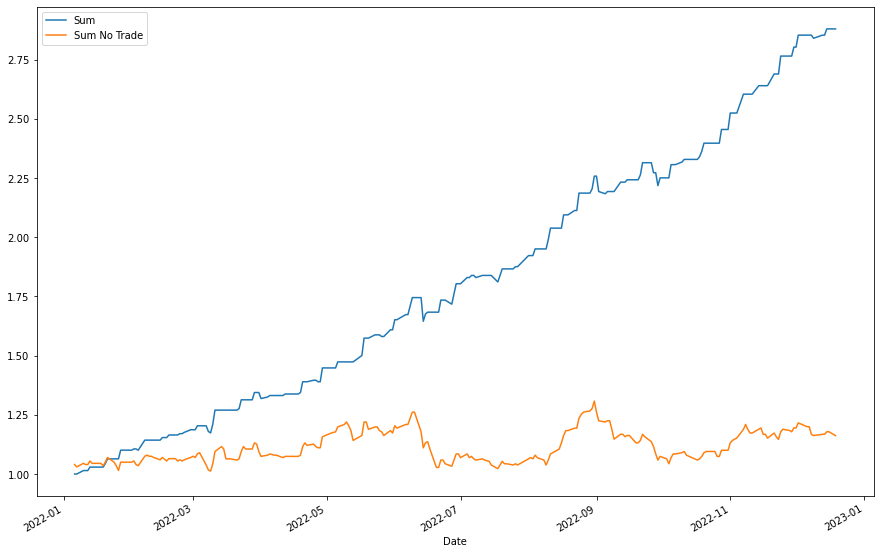

Size of portfolio at the end of 2022: 1162275.8502909855


In [21]:
log_ret_AOT = log_ret["TOP"] #x[t+1]
log_retm2 = log_ret_AOT.shift(3) #x[t-2]
log_retm1 = log_ret_AOT.shift(2) #x[t-1]
log_retm0 = log_ret_AOT.shift(1) #x[t]
prd = al[0] * log_retm0 + al[1]*log_retm1 + al[2]*log_retm2

ret_shiftt = pd.DataFrame([log_ret_AOT,log_retm0,log_retm1,log_retm2,prd])
ret_shiftt = ret_shiftt.T
ret_shiftt.columns = ["Xt+1","Xt","Xt-1","Xt-2","Pred"]
#display(ret_shiftt)

ret_shiftt["Pred"].iloc[0]
ret_shiftt["Pred"] = ret_shiftt["Pred"].fillna(-1)
ret_shiftt["Bool"] = ret_shiftt["Pred"]
ray = np.array(ret_shiftt["Pred"])
ray = np.where(ray<0,0,1)
ret_shiftt["Bool"] = ray
con = ret_shiftt[["Xt","Bool"]].copy()
con["RealRet"] = con["Bool"]*con["Xt"]
con["Sum"] = con["RealRet"].cumsum()
con["Sum No Trade"] = con["Xt"].cumsum()


plt.figure(figsize=(15,10))

np.exp(con["Sum"]).plot(legend=" ")
np.exp(con["Sum No Trade"]).plot(legend=" ")
plt.show()

cp = np.exp([con["Sum No Trade"].iloc[-1],con["Sum"].iloc[-1]])
print(f"Size of portfolio at the end of 2022: {cp[0]*1000*1000}")

[*********************100%***********************]  1 of 1 completed
With the buy-and-hold strategy, Final Wealth: 1,112,398.93, Gain (or Loss): 11.24%.


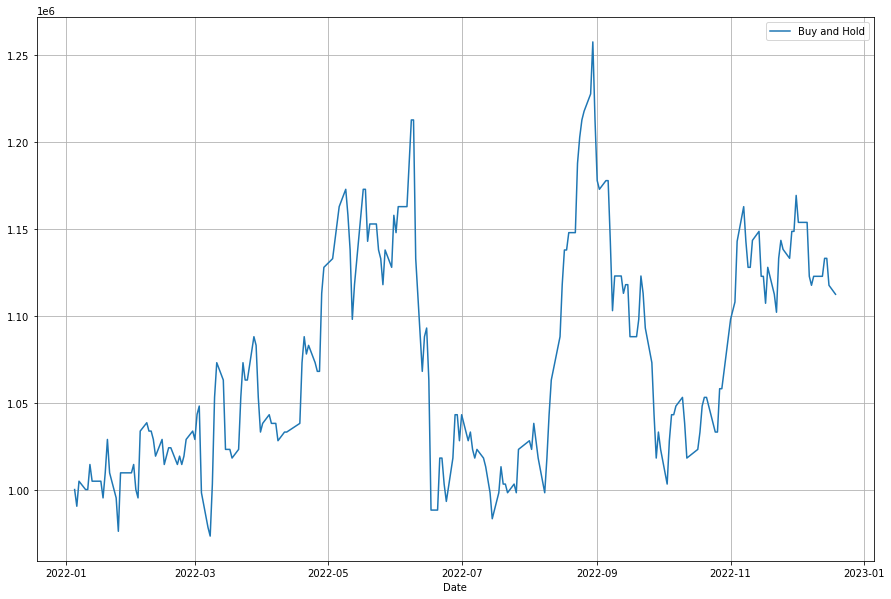

In [22]:
# example code to compute buy-and-hold strategy on BH
log_top = log_ret['TOP']
top =  yf.download("TOP.BK", start="2022-01-01", end="2022-12-20")['Adj Close'] # load data from yahoo 
init_wealth = 1_000_000
buy_and_hold = []
for cnt, date in enumerate(log_top.index):
  if cnt == 0:
    sb = init_wealth / top[date]
  buy_and_hold.append(sb * top[date])
  
  

buy_and_hold = pd.Series(data=buy_and_hold, index=log_top.index)
plt.figure(figsize=(15,10))

plt.plot(buy_and_hold, label="Buy and Hold")
plt.xlabel('Date')
plt.legend()
plt.grid()
gain_bd = buy_and_hold.iloc[-1] / init_wealth - 1 
print(f"With the buy-and-hold strategy, Final Wealth: {buy_and_hold.iloc[-1]:,.2f}, Gain (or Loss): {gain_bd*100:0.2f}%.")



- Size of portfolio at the end of 2022: 1,162,275.85 THB.
- Gain or Loss at of the proposed trading strategy is: 16.22 %.
- Size of portfolio of Buy-and-hold strategy at the end of 2022: 1,112,398.93 THB
- Gain or Loss at of Buy-and-hold strategy at the end of 2022: 11.24 %.